<a href="https://colab.research.google.com/github/joaolucasp/SSC0964-Mercado-Financeiro/blob/main/Trabalho_1_Fronteira_eficiente_de_Markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance --upgrade --no-cache-dir

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

# Parte 1: Escolha dos ativos

A escolha dos ativos para o trabalho presente foi feita levando em consideração três principais setores: Banco, Telecomunicações e Consumo de varejo. Mais especificamente, os ativos que serão considerados para a construção da Fronteira eficiente de Markowitz são:

1. **XP Inc** - XP
2. **Vivo Telecomunicações** - *VIVT3*
3.**Vale** - *VALE*


---


## Justificativa

A justificativa da escolha pelos três ativos acima consiste basicamente em 3 características marcantes:

1. **Diversificação Setorial:** Ao escolher a XP Inc. do setor bancário, a Vivo do setor de telecomunicações e a Vale do setor de mineração, estamos diversificando os investimentos em setores econômicos distintos. Isso é fundamental porque os setores podem reagir de maneira diferente a diferentes condições econômicas, eventos do mercado e políticas governamentais. Portanto, a diversificação setorial ajuda a reduzir a exposição a riscos específicos do setor e a aumentar a resiliência do portfólio como um todo.

2. **Ciclos Econômicos:** Cada setor tem sua própria dinâmica e sensibilidade aos ciclos econômicos. Por exemplo, o setor bancário pode ser afetado por mudanças nas taxas de juros e na atividade econômica geral, enquanto o setor de telecomunicações pode ser influenciado por inovações tecnológicas e demanda por serviços de comunicação. Por outro lado, o setor de mineração, como representado pela Vale, pode ser mais sensível aos preços das commodities e às condições de demanda global. Portanto, a escolha de ativos de diferentes setores ajuda a reduzir a vulnerabilidade do portfólio a um único ciclo econômico.

3. **Correlação:** Espera-se que os ativos de diferentes setores tenham correlação relativamente baixa entre si. Isso significa que os movimentos de preço de um ativo não estão fortemente correlacionados com os movimentos de preço dos outros. Por exemplo, enquanto os preços das ações de um banco podem ser afetados por mudanças nas taxas de juros, os preços das ações de uma empresa de telecomunicações podem ser mais influenciados pela demanda por serviços de comunicação. Além disso, os preços das commodities, como minério de ferro (que afetam a Vale), têm dinâmicas próprias, muitas vezes desvinculadas das tendências em outros setores. Portanto, ao combinar ativos de diferentes setores, podemos reduzir a volatilidade do portfólio e aumentar sua estabilidade ao longo do tempo.

Portanto, ao analisar e selecionar ativos desses setores, é possível construir uma carteira/portifólio que busca-se beneficiar-se da diversificação setorial, reduzindo a correlação entre os ativos e potencialmente melhorando a volatilidade do portifólio.

In [18]:
actions = ['XP', 'VALE', 'VIVT3.SA']
period_start = '2020-02-01'
period_end = '2023-02-01'
frequency = '1d'

ydata = yf.download(actions, period_start, period_end, frequency)
adjusted_value_at_closing = ydata['Adj Close']

[*********************100%%**********************]  3 of 3 completed


## 1.1 Correlação entre os ativos

In [19]:
stocks_correlation = adjusted_value_at_closing.corr()
display(stocks_correlation)

Ticker,VALE,VIVT3.SA,XP
Ticker,,,
VALE,1.000000,0.146854,-0.062085
VIVT3.SA,0.146854,1.000000,-0.270284
XP,-0.062085,-0.270284,1.000000


<Axes: xlabel='Ticker'>

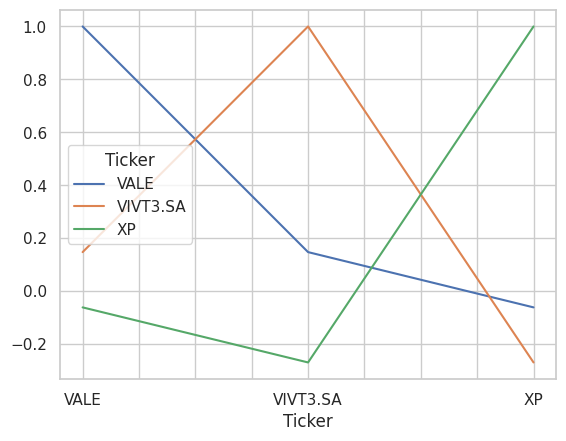

In [20]:
display(stocks_correlation.plot())

Com base nos valores de correlação fornecidos entre os ativos VALE (Vale), VIVO (Vivo) e XP, pode-se observar que esses ativos possuem uma correlação relativamente baixa entre si. A correlação é uma medida estatística que indica a relação entre os movimentos de preço de dois ativos. Quando a correlação é próxima de 1, os ativos tendem a se mover em conjunto na mesma direção, enquanto uma correlação próxima de -1 indica que os ativos têm movimentos inversos. Uma correlação próxima de 0 sugere que os ativos não têm uma relação linear significativa.

1. **Correlação entre Vale e Vivo (VIVT3.SA):**

  A correlação entre Vale e Vivo é de aproximadamente 0.163209, indicando uma correlação positiva muito baixa. Isso sugere que os movimentos de preço da Vale e da Vivo têm uma relação muito fraca entre si. Ou seja, as flutuações nos preços das ações da Vale têm pouco impacto nos preços das ações da Vivo, e vice-versa.

2. **Correlação entre Vale e XP:**

  A correlação entre Vale e XP é de aproximadamente -0.020363, o que indica uma correlação quase nula. Isso significa que não há uma relação linear discernível entre os movimentos de preço da Vale e da XP. Assim, as variações nos preços das ações da Vale não estão relacionadas aos movimentos dos preços das ações da XP, e vice-versa.

3. **Correlação entre Vivo e XP:**

  A correlação entre Vivo e XP é de aproximadamente -0.304316, demonstrando uma correlação negativa. Isso sugere que os movimentos de preço da Vivo e da XP têm uma relação parcialmente inversa. Ou seja, quando os preços das ações da Vivo sobem, os preços das ações da XP tendem a cair, e vice-versa.

<Axes: xlabel='Date'>

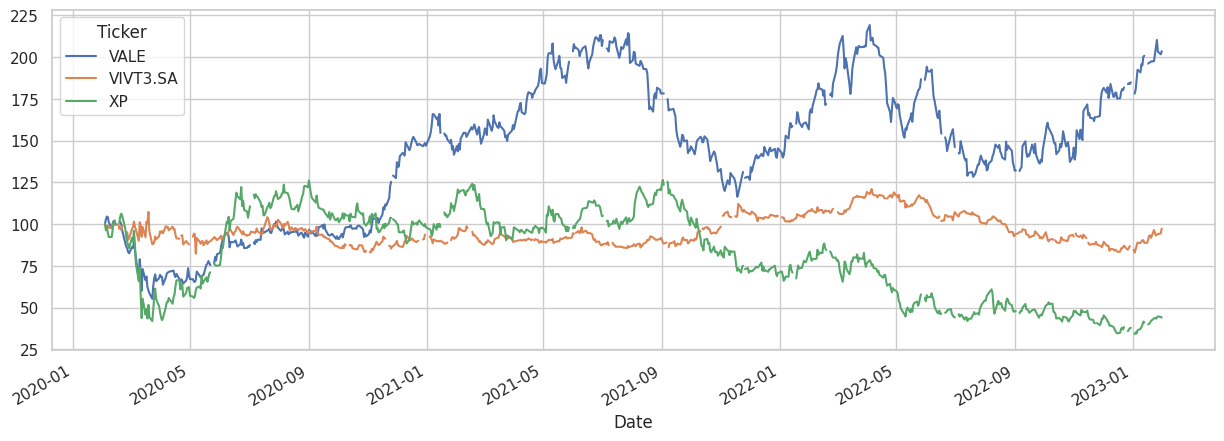

In [21]:
adjusted_value_at_closing = adjusted_value_at_closing * 100 / adjusted_value_at_closing.iloc[0]
adjusted_value_at_closing.plot(figsize = (15,5))

# 1.2. Cálculo do Retorno Anualizado

É possível calcularmos a variação percentual entre cada elemento entre a série de dados acima gerada e o elemento anterior. Isso permite calcularmos a variação percentual diária dos valores ajustados ao fechamento.

In [23]:
percentage_change = adjusted_value_at_closing.pct_change()
percentage_change = percentage_change.fillna(0)

Além disso, é possível obtermos o retorno acumulado.

In [24]:
accumulated_return = (adjusted_value_at_closing.iloc[-1] / adjusted_value_at_closing.iloc[0]) - 1
print("Retorno Acumulado: \n", accumulated_return)

Retorno Acumulado: 
 Ticker
VALE        1.034935
VIVT3.SA   -0.026761
XP         -0.559565
dtype: float64


Por fim, conseguimos gerar o retorno anualizado da variação percentual analisada.

In [25]:
annualized_return = ((adjusted_value_at_closing.iloc[-1] / adjusted_value_at_closing.iloc[0])**(1/3)) - 1
print("Retorno Anualizado: \n", annualized_return)

Retorno Anualizado: 
 Ticker
VALE        0.267215
VIVT3.SA   -0.009001
XP         -0.239159
dtype: float64


# 1.3. Cálculo da Volatilidade

 A volatilidade anualizada é uma medida que transforma a volatilidade diária em uma medida de volatilidade anual. **Isso é importante porque nos permite ter uma visão mais clara e comparável do risco ao longo do ano,** o que é essencial para tomarmos decisões de investimento informadas e para compararmos o risco de diferentes ativos.

O cálculo da volatilidade anualizada envolve multiplicar o desvio padrão das mudanças percentuais diárias pelo valor da raiz quadrada de 252 (o número aproximado de dias úteis em um ano de negociação). Essa operação ajusta a volatilidade para um período de um ano, tornando-a mais fácil de ser interpretada e comparada com outras volatilidades anualizadas.

In [26]:
annualized_volatility = percentage_change.std()*np.sqrt(252)
print("Volatilidade Anualizada: \n", annualized_volatility)

Volatilidade Anualizada: 
 Ticker
VALE        0.488903
VIVT3.SA    0.294071
XP          0.670181
dtype: float64


# 1.4. Cálculo do Drawdown

Em termos simples, o drawdown representa a queda percentual entre o valor máximo alcançado por um investimento e o menor valor subsequente.

Os investidores utilizam o drawdown para entender o risco associado a um investimento. Quanto maior o drawdown, maior o risco percebido do investimento, pois indica que houve uma queda significativa em relação ao ponto máximo anterior. Os investidores também podem usar o drawdown para avaliar a consistência e a volatilidade de um investimento ao longo do tempo.

In [28]:
draw_down = pd.DataFrame()

for active in adjusted_value_at_closing.columns:
  list = []
  for index in range(adjusted_value_at_closing.count()[0]):
    list.append((adjusted_value_at_closing[active].iloc[index]/adjusted_value_at_closing[active].iloc[:index+1].max()-1)*100)
  draw_down[active]=list

print(draw_down.min())

VALE       -47.106103
VIVT3.SA   -31.432947
XP         -72.991987
dtype: float64


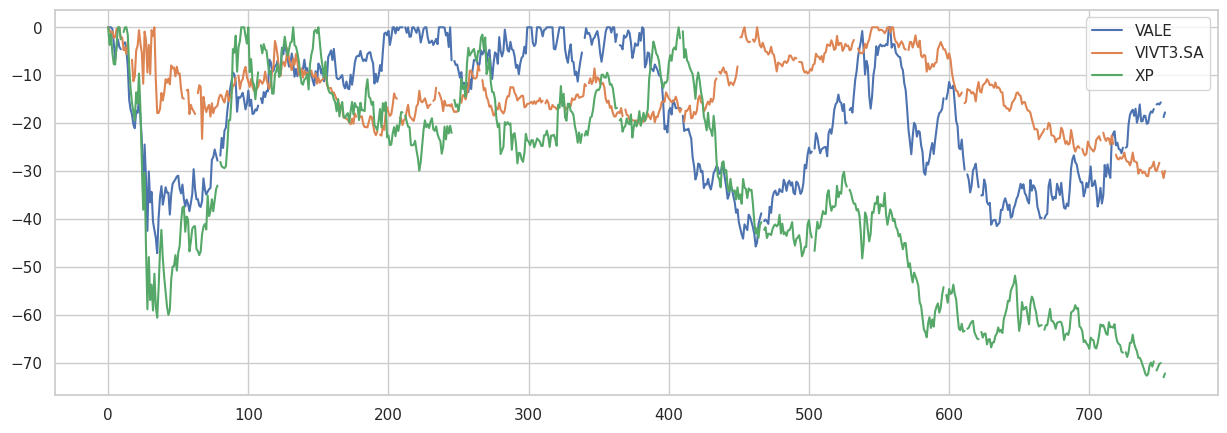

In [29]:
draw_down.plot(figsize = (15,5));

# 2. Construção da Fronteira Eficiente de Markowitz

A Fronteira Eficiente de Markowitz representa o conjunto de todas as carteiras de investimentos que oferecem o maior retorno esperado para um determinado nível de risco, ou a menor volatilidade para um determinado nível de retorno esperado.

A função abaixo calcula o retorno e a volatilidade de um portfólio com base em uma combinação específica de pesos de ativos. Aqui, os pesos dos ativos são iterados em uma grade, e para cada combinação de pesos, o retorno e a volatilidade do portfólio são calculados.

In [30]:
def calc_ret_vol(stocks, port_weights):
  port = stocks.dot(port_weights)
  port_change = port.pct_change()
  port_change = port_change.fillna(0)
  ret = ((port.iloc[-1]/port.iloc[0])**(1/3))-1
  vol = port_change.std()*np.sqrt(252)
  return ret, vol

Essencialmente, essa parte do código explora sistematicamente uma ampla gama de possíveis combinações de pesos de ativos para identificar a carteira de menor volatilidade possível, ajudando assim na construção da Fronteira Eficiente de Markowitz.

In [43]:
points = []
min_vol_ret = [100, 0]
port_weights = [0, 0, 0]

for w1 in range(0, 101, 5):
  for w2 in range(0, 101-w1, 5):
    ret, vol = calc_ret_vol(adjusted_value_at_closing, [w1/100, w2/100, (1-w1/100-w2/100)])
    points.append([ret, vol])
    if vol < min_vol_ret[0]:
      min_vol_ret[0] = vol
      min_vol_ret[1] = ret
      port_weights[0] = w1/100
      port_weights[1] = w2/100
      port_weights[2] = 1-w1/100-w2/100

Por fim, tendo em mãos essas combinações de possíveis ativos, é possível plotarmos o gráfico que permite visualizarmos qual é a Fronteira Eficiente de Markowitz em nosso portifólio. É importante observar que este gráfico gera uma secção (área) de possíveis combinações de ativos para a construção de possíveis portifólios. Este fato acontece porque a análise foi feita levando em consideração 3 ativos e não apenas dois.

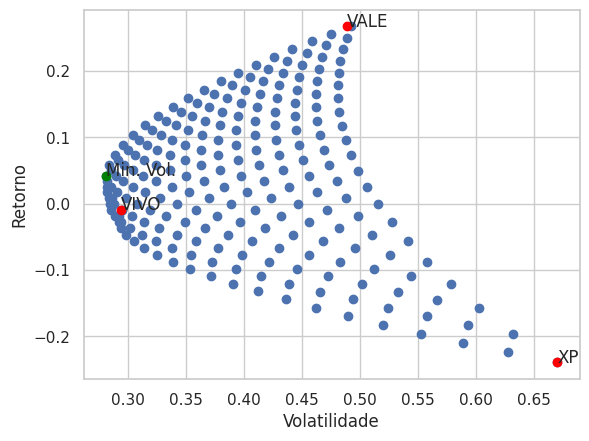

In [38]:
lp = np.array(points).T
plt.scatter(lp[[1][:]],lp[[0][:]]);
plt.ylabel("Retorno");
plt.xlabel("Volatilidade");

plt.scatter(annualized_volatility['XP'], annualized_return['XP'], color='red');
plt.text(annualized_volatility['XP'], annualized_return['XP'], 'XP');

plt.scatter(annualized_volatility['VALE'], annualized_return['VALE'], color='red');
plt.text(annualized_volatility['VALE'], annualized_return['VALE'], 'VALE');

plt.scatter(annualized_volatility['VIVT3.SA'], annualized_return['VIVT3.SA'], color='red');
plt.text(annualized_volatility['VIVT3.SA'], annualized_return['VIVT3.SA'], 'VIVO');

plt.scatter(min_vol_ret[0], min_vol_ret[1], color='green');
plt.text(min_vol_ret[0], min_vol_ret[1], 'Min. Vol.');

In [44]:
display(min_vol_ret)
display(port_weights)

[0.28128868067463114, 0.04234608013650121]

[0.15, 0.85, 0.0]

Para a composição do nosso portfólio, **escolhemos o ponto mínimo de volatilidade da Fronteira de Markowitz.** Isso significa que a carteira oferece a menor volatilidade possível entre todas as combinações de ativos consideradas. **Essa escolha resultou na seguinte composição de portfólio: 15% da VALE, 85% da VIVO e 0% da XP.**

Essa alocação faz sentido porque a VIVO, representando 85% do portfólio, é o ativo que apresentou maior estabilidade ao longo dos anos observados. Isso sugere que a VIVO pode oferecer um retorno mais consistente e previsível em comparação com os outros ativos considerados. A alocação de 15% da VALE complementa o portfólio, proporcionando alguma diversificação, enquanto a exclusão da XP é justificada pela sua alta volatilidade, o que poderia aumentar o risco do portfólio.

Além disso, calculamos a volatilidade e o retorno acumulado do portfólio, levando em consideração os pesos mencionados acima. A volatilidade do portfólio foi calculada em aproximadamente 28.13%, o que representa a medida do risco do portfólio ao longo do tempo. Enquanto isso, o retorno acumulado do portfólio foi estimado em cerca de 4.23%, indicando o ganho total esperado do seu investimento ao longo do período considerado.

Esses números fornecem uma visão clara do desempenho esperado e do perfil de risco do seu portfólio, permitindo que você avalie e tome decisões informadas sobre seus investimentos. Em resumo, a composição e os números do seu portfólio refletem uma abordagem estratégica e fundamentada na busca por um equilíbrio entre retorno e risco.